In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
# depends on the need
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import pickle
import warnings


In [96]:
data=pd.read_csv('avocado.csv')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   c_1           18249 non-null  float64
 5   c_2           18249 non-null  float64
 6   c_3           18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [98]:
data.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
c_1,0
c_2,0
c_3,0
Total Bags,0
Small Bags,0
Large Bags,0


Axes(0.125,0.11;0.698618x0.77)


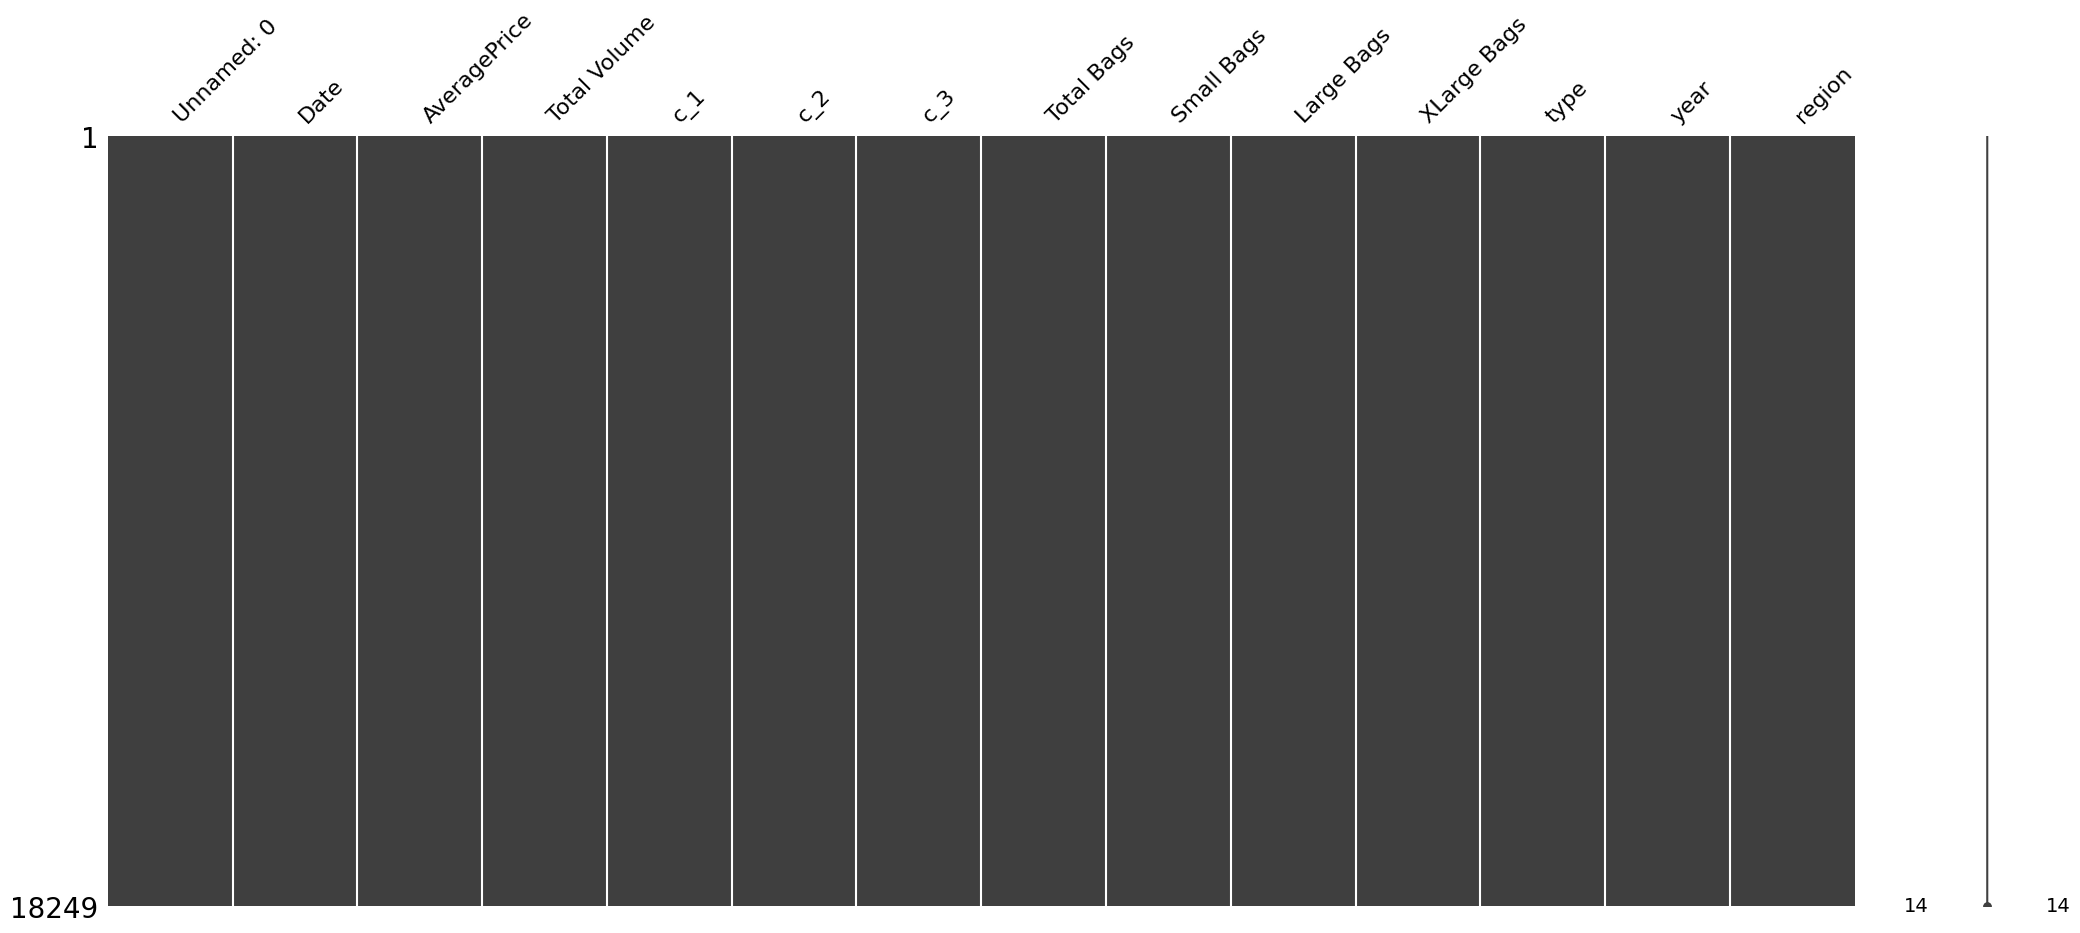

In [99]:
missing_values=msno.matrix(data)
print(missing_values)

# NO missing Values

In [100]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,c_1,c_2,c_3,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [101]:
print(data.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'c_1', 'c_2',
       'c_3', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [102]:
data.drop('Unnamed: 0', axis=1, inplace=True)


In [103]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

<ipython-input-103-5e6407fd1ec9>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


In [104]:
def value_frequency(data,feature):
  value=data[feature].value_counts()
  frequency=data[feature].value_counts(normalize=True)
  labels=value.index
  counts=value.values
# pie plot
  plt.figure(figsize=(5,4))
  plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90)
  plt.title(feature.capitalize())
  plt.axis('equal')
  plt.show()
data=pd.DataFrame(data)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [105]:
import seaborn as sns
def hist_plot(data,feature,the_bins=20):
  if feature=='type':
    fig,ax=plt.subplots(figsize=(3,4))
    sns.histplot(data[feature],bins=the_bins,kde=True)
    plt.title(format(feature))
    plt.show()
  if feature=='region':
    fig,ax=plt.subplots(figsize=(3,4))
    sns.histplot(data[feature],bins=the_bins,kde=True)
    plt.title(format(feature))
    plt.show()
  if feature=='year':
    fig,ax=plt.subplots(figsize=(3,4))
    sns.histplot(data[feature],bins=the_bins,kde=True)
    plt.title(format(feature))
    plt.show()
  if feature=='XLarge Bags':
    fig,ax=plt.subplots(figsize=(3,4))
    sns.histplot(data[feature],bins=the_bins,kde=True)
    plt.title(format(feature))
    plt.show()
  if feature=='Total Bags':
    fig,ax=plt.subplots(figsize=(3,4))
    sns.histplot(data[feature],bins=the_bins,kde=True)
    plt.title(format(feature))
    plt.show()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [106]:

import matplotlib.pyplot as plt
import seaborn as sns

def create_bar_plots(data, feature):
    if feature == 'year':
        fig, ax = plt.subplots(figsize=(8, 8))
        sns.barplot(x=data[feature].value_counts(normalize=True).index, y=data[feature].value_counts(normalize=True).values, ax=ax)
        ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

    elif feature == 'region':
        fig, ax = plt.subplots(figsize=(8, 8))
        sns.barplot(x=data[feature].value_counts(normalize=True).index, y=data[feature].value_counts(normalize=True).values, ax=ax)
        ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

    elif feature == 'type':
        fig, ax = plt.subplots(figsize=(8, 8))
        sns.barplot(x=data[feature].value_counts(normalize=True).index, y=data[feature].value_counts(normalize=True).values, ax=ax)
        ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

    elif feature == 'XLarge Bags':
        fig, ax = plt.subplots(figsize=(8, 8))
        sns.barplot(x=data[feature].value_counts(normalize=True).index, y=data[feature].value_counts(normalize=True).values, ax=ax)
        ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

    elif feature == 'Total Bags':
        fig, ax = plt.subplots(figsize=(8, 8))
        sns.barplot(x=data[feature].value_counts(normalize=True).index, y=data[feature].value_counts(normalize=True).values, ax=ax)
        ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

    else:
        print(f"Bar plot not defined for feature '{feature}'.")

# Example usage:
# Assuming 'data' is your DataFrame containing the Avocado dataset
# and 'feature' is the column name you want to visualize
# create_bar_plots(data, 'year')


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data, feature):
    if feature == 'type':
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.boxplot(x='type', y=data.columns[4], data=data, hue='type',
                    boxprops=dict(facecolor='cyan'),  # Customize box color
                    whiskerprops=dict(color='green'),  # Customize whisker color
                    capprops=dict(color='red'),  # Customize cap (line atop whisker) color
                    medianprops=dict(color='black'))  # Customize median line color
        plt.title(feature)
        plt.show()

    elif feature == 'region':
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.boxplot(x=data[feature], ax=ax,
                    boxprops=dict(facecolor='cyan'),
                    whiskerprops=dict(color='green'),
                    capprops=dict(color='red'),
                    medianprops=dict(color='black'))
        plt.title(feature)
        plt.show()

    elif feature in ['Small Bags', 'Large Bags', 'XLarge Bags', 'c_1', 'c_2', 'c_3', 'Total Bags','year','Total Volume']:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.boxplot(x=data[feature], ax=ax,
                    boxprops=dict(facecolor='cyan'),
                    whiskerprops=dict(color='green'),
                    capprops=dict(color='red'),
                    medianprops=dict(color='black'))
        plt.title(feature)
        plt.show()

    else:
        print(f"Box plot not defined for feature '{feature}'.")

# Example usage:
# Assuming 'data' is your DataFrame containing the Avocado dataset
# and 'feature' is the column name you want to visualize
# box_plot(data, 'Small Bags')


In [108]:
# average price per month

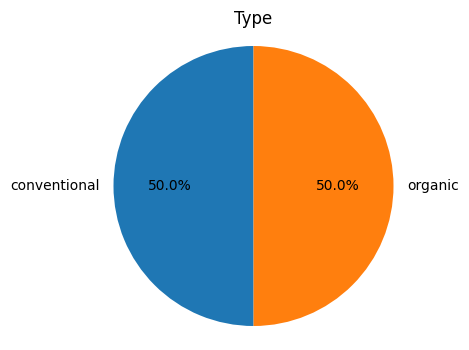

In [109]:
value_frequency(data,'type')

<ipython-input-106-adf894166445>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')


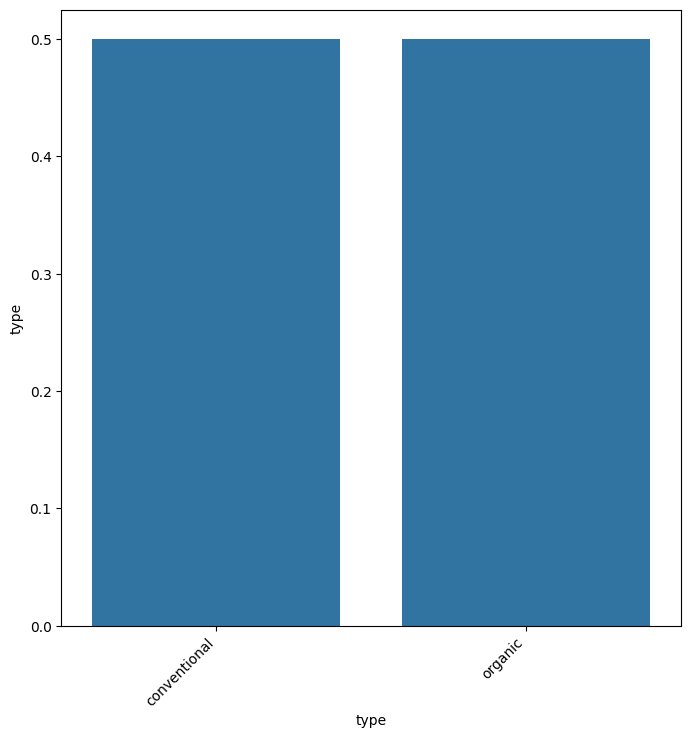

In [110]:
create_bar_plots(data,'type')


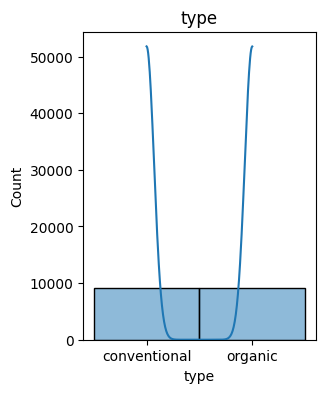

In [111]:
hist_plot(data,'type')

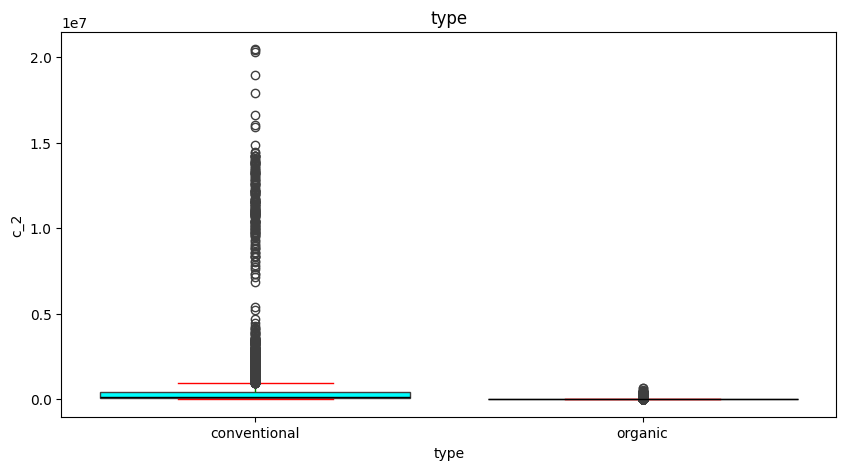

In [112]:
box_plot(data,'type')


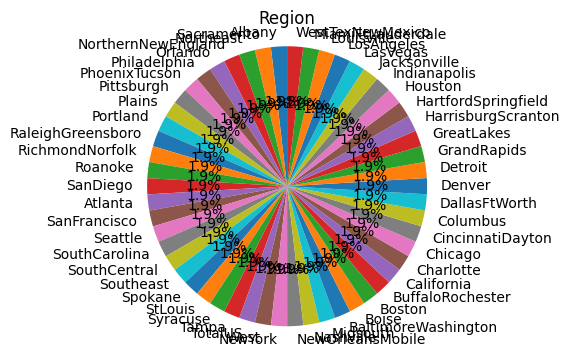

In [ ]:
value_frequency(data,'region')

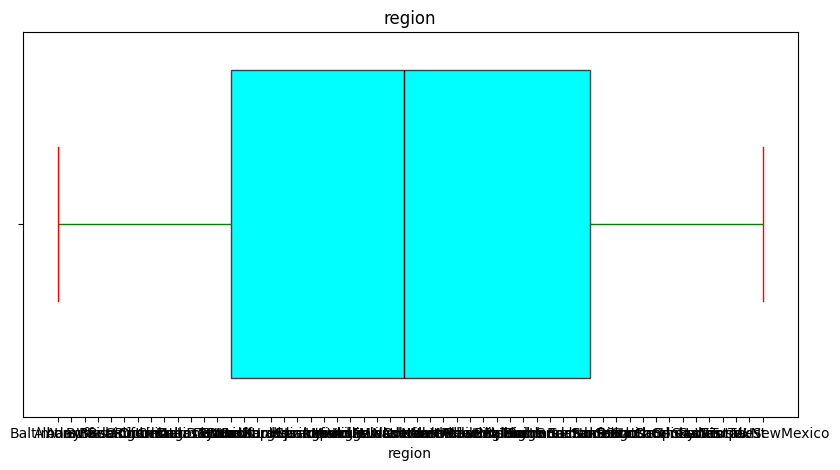

In [113]:
box_plot(data,'region')

<ipython-input-106-adf894166445>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')


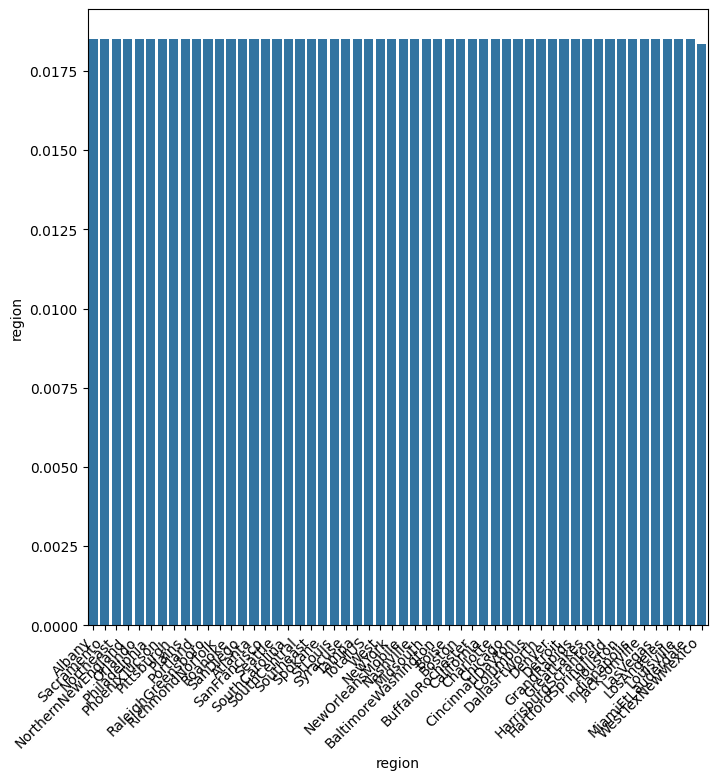

In [114]:
create_bar_plots(data,'region')


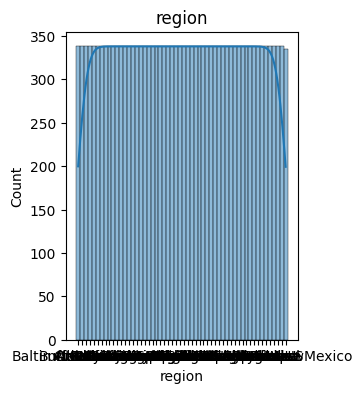

In [115]:
hist_plot(data,'region')

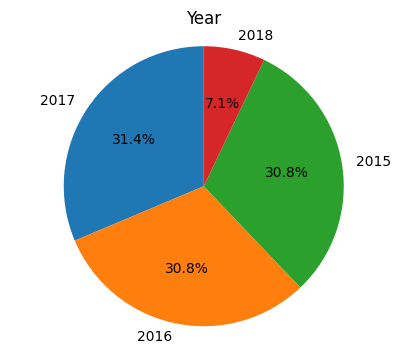

In [116]:
value_frequency(data,'year')

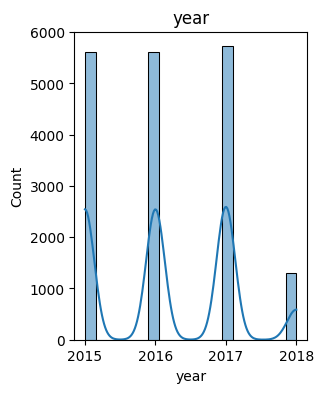

In [117]:
hist_plot(data,'year')

<ipython-input-106-adf894166445>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=data[feature].value_counts(normalize=True).index, rotation=45, ha='right')


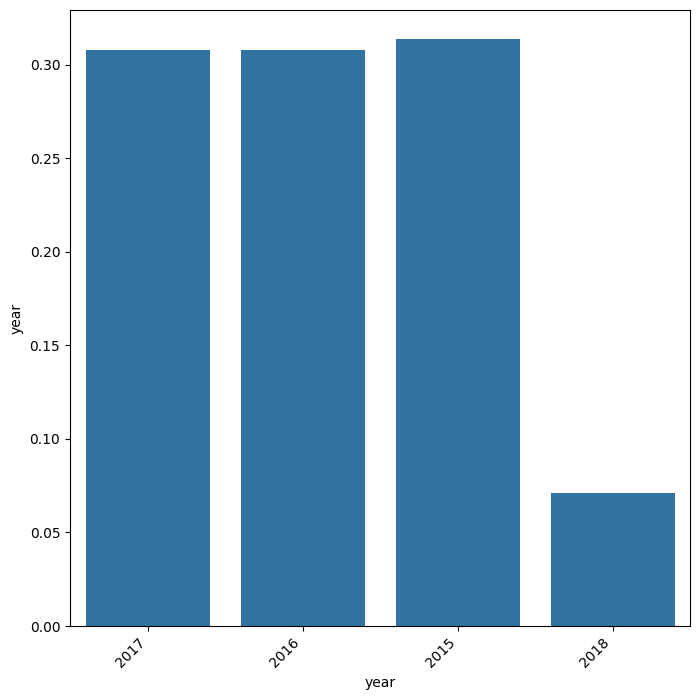

In [118]:
create_bar_plots(data,'year')

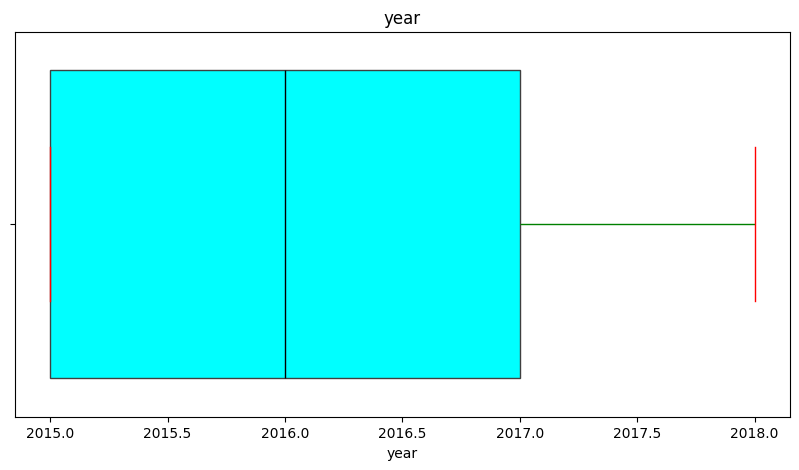

In [119]:
box_plot(data,'year')

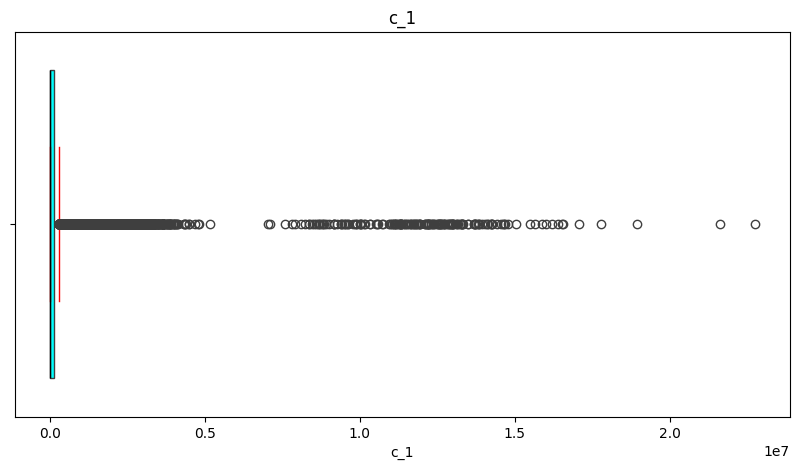

In [120]:
box_plot(data,'c_1')

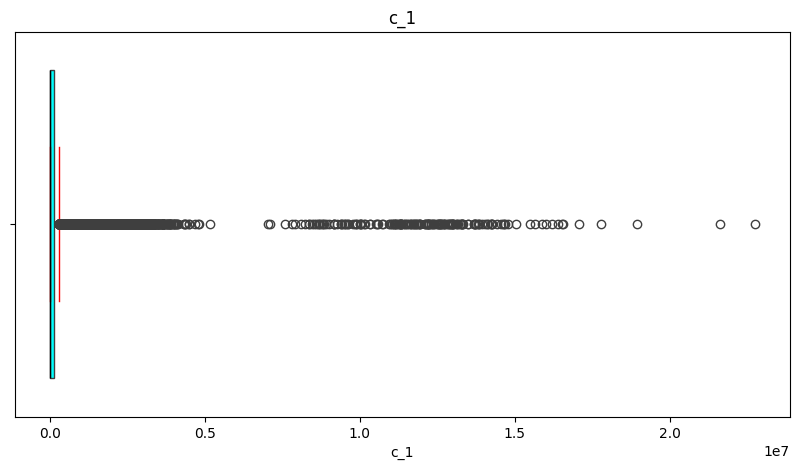

In [121]:
box_plot(data,'c_1')

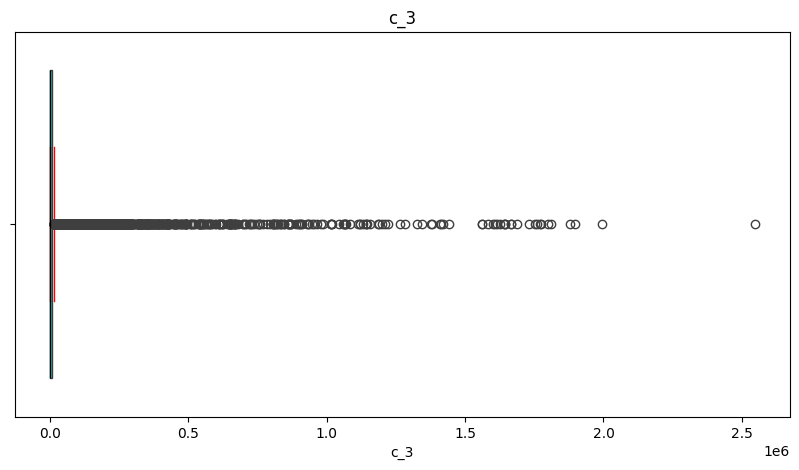

In [122]:
box_plot(data,'c_3')

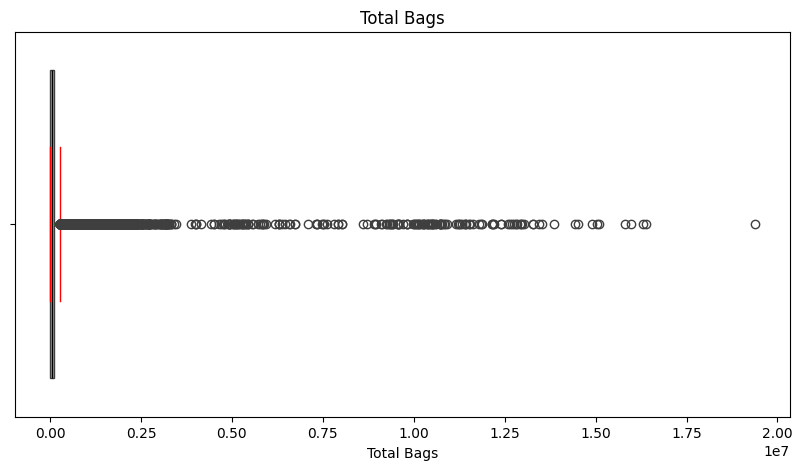

In [123]:
box_plot(data,'Total Bags')

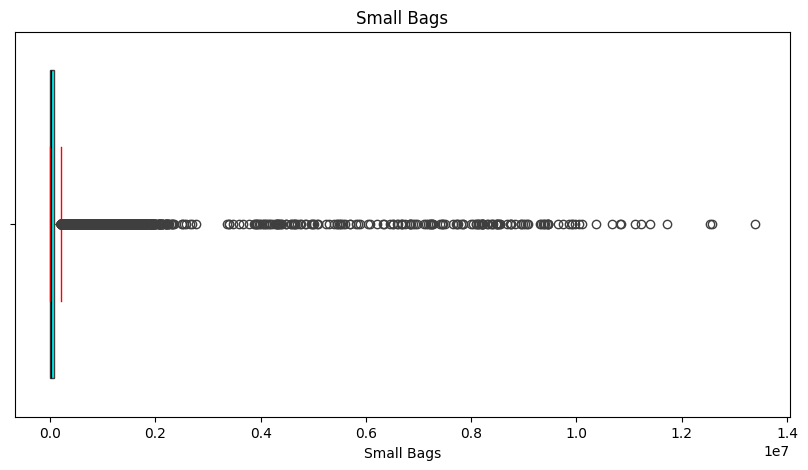

In [124]:
box_plot(data,'Small Bags')

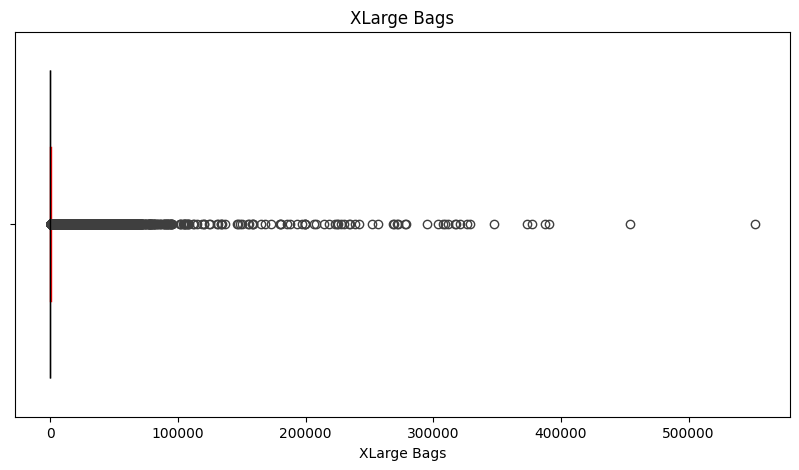

In [125]:
box_plot(data,'XLarge Bags')

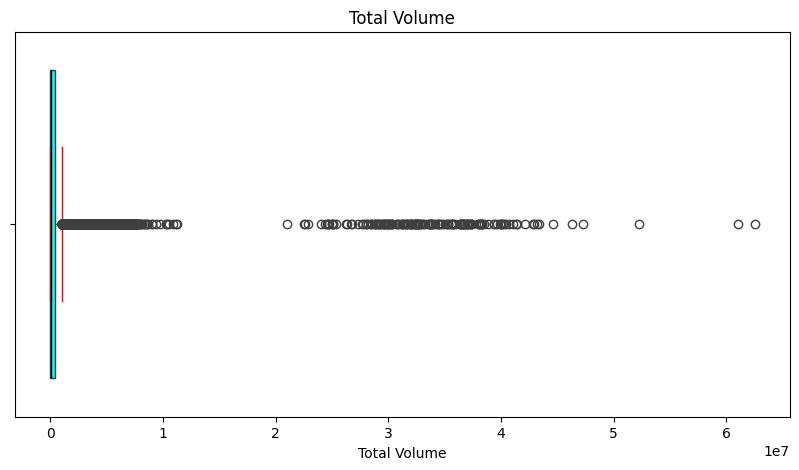

In [126]:
box_plot(data,'Total Volume')

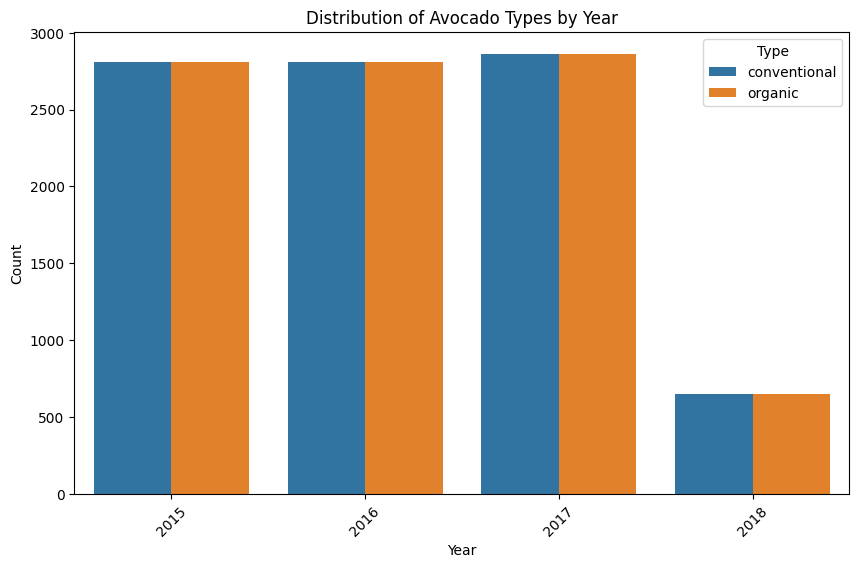

In [127]:

# Example assuming 'data' is your DataFrame with columns 'type' and 'year'
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='type', data=data)
plt.title('Distribution of Avocado Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


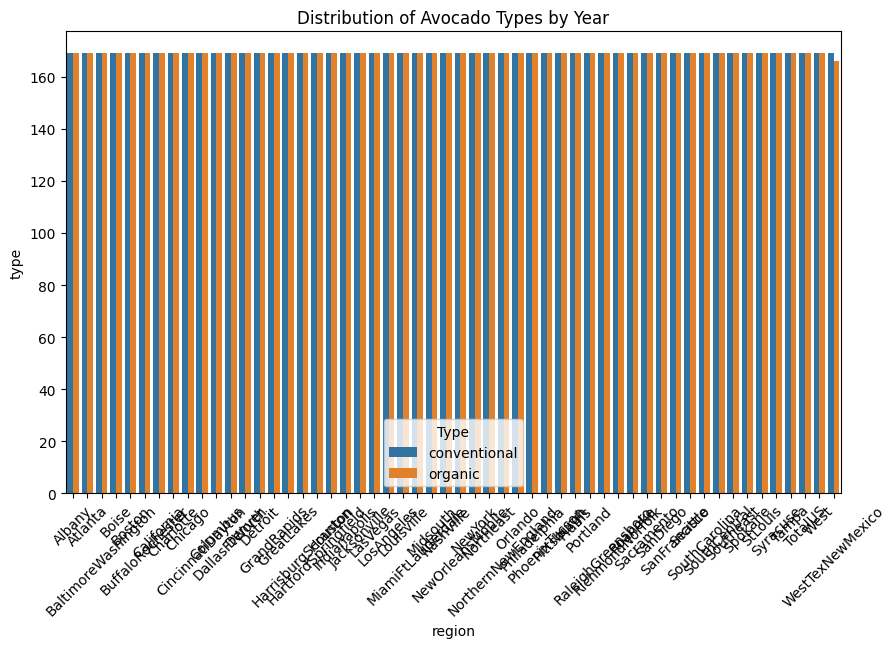

In [128]:

# Example assuming 'data' is your DataFrame with columns 'type' and 'year'
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='type', data=data)
plt.title('Distribution of Avocado Types by Year')
plt.xlabel('region')
plt.ylabel('type')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


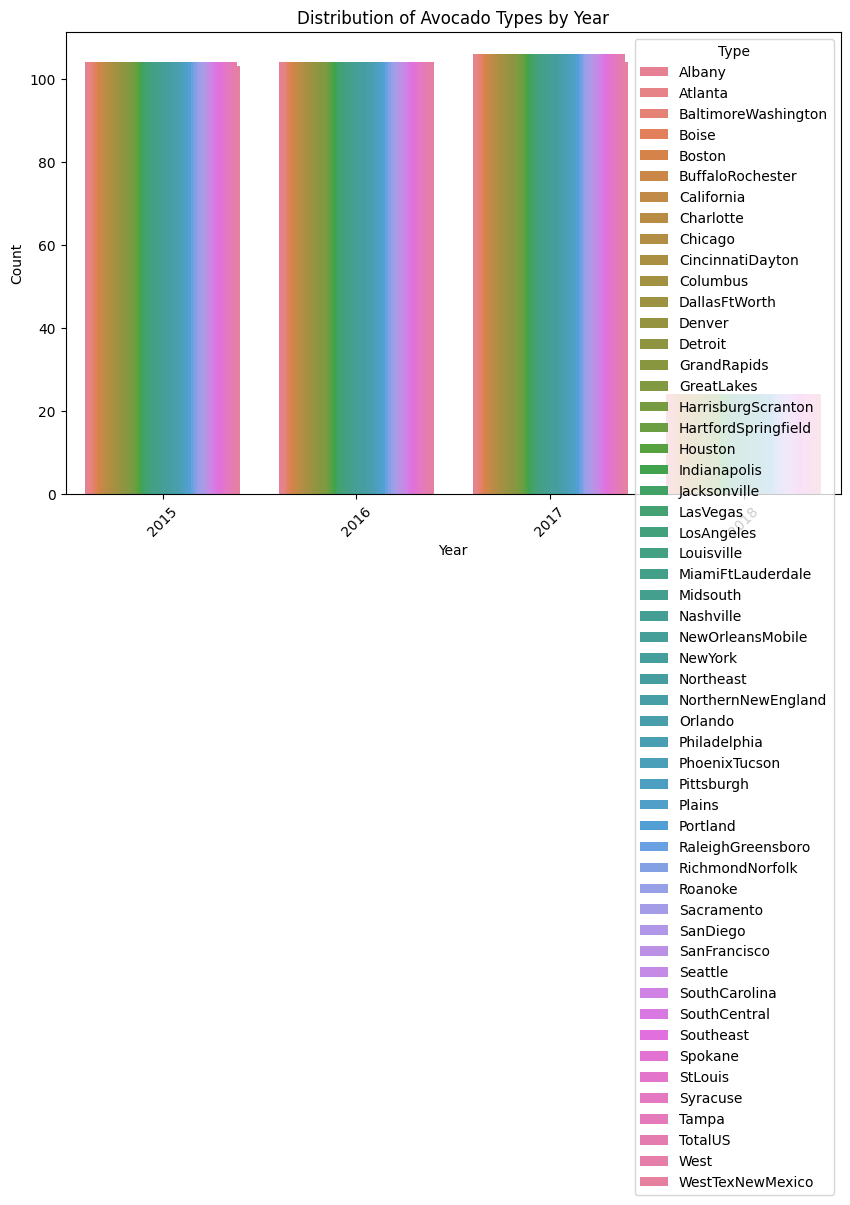

In [129]:

# Example assuming 'data' is your DataFrame with columns 'type' and 'year'
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='region', data=data)
plt.title('Distribution of Avocado Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


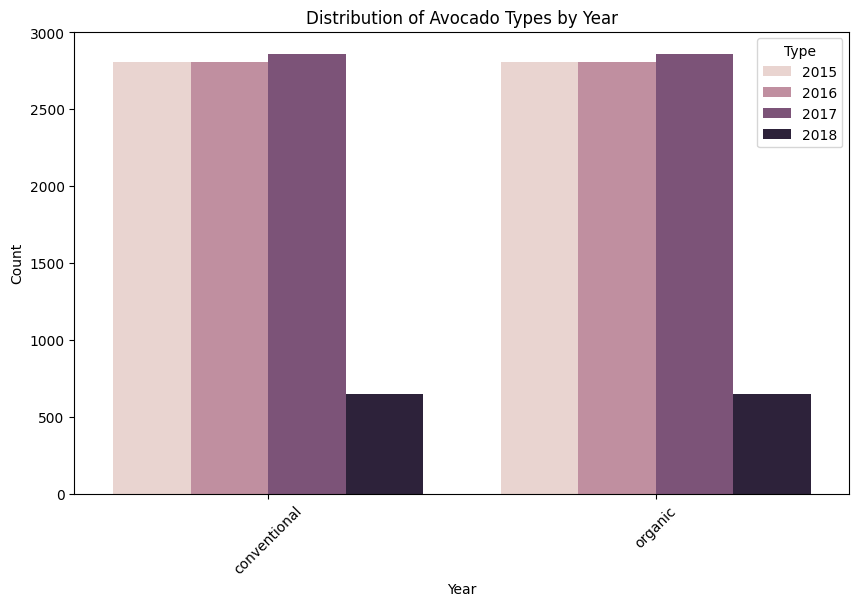

In [130]:
# Example assuming 'data' is your DataFrame with columns 'type' and 'year'
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='year', data=data)
plt.title('Distribution of Avocado Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


In [131]:
data

,Date,AveragePrice,Total Volume,c_1,c_2,c_3,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


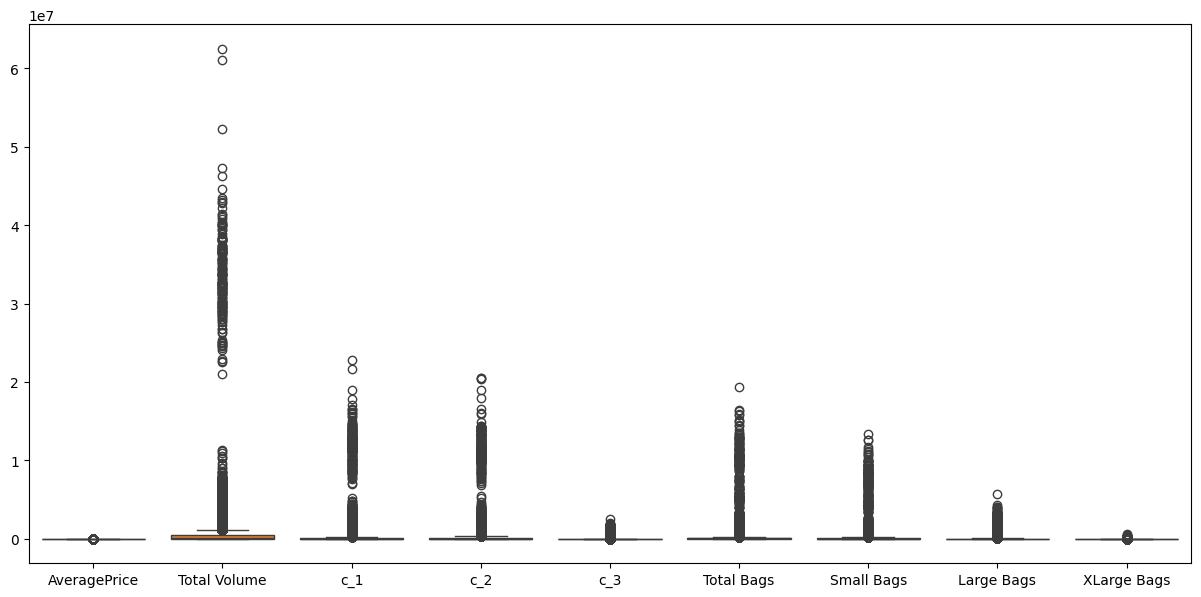

In [132]:
plt.figure(figsize=(15, 7), dpi=100)
sns.boxplot(data=data[[
 'AveragePrice',
 'Total Volume',
 'c_1',
 'c_2',
 'c_3',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])
plt.show()

In [133]:
import numpy as np
from numpy import percentile

columns = data.columns
for j in columns:
    if isinstance(data[j][0], str):
        continue
    else:
        # Defining quartiles
        quartiles = percentile(data[j], [25, 75])
        # Calculate min/max (lower and upper fences)
        lower_fence = quartiles[0] - (1.5 * (quartiles[1] - quartiles[0]))
        upper_fence = quartiles[1] + (1.5 * (quartiles[1] - quartiles[0]))
        # Apply the transformation to cap the outliers
        data[j] = data[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))


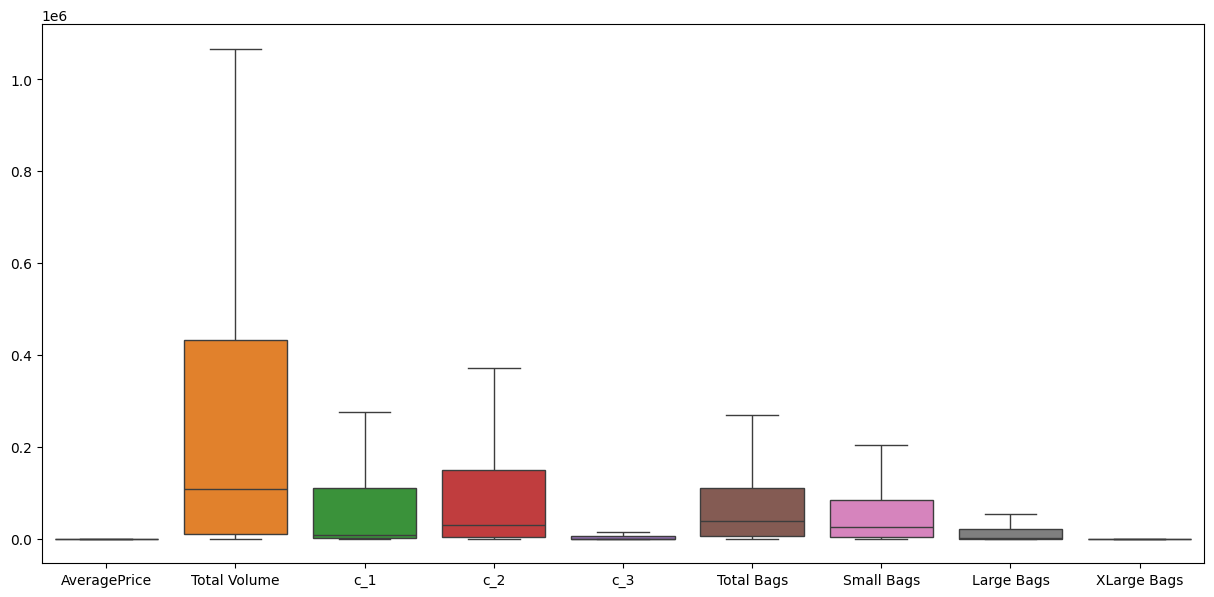

In [134]:
plt.figure(figsize=(15, 7), dpi=100)
sns.boxplot(data=data[[
 'AveragePrice',
 'Total Volume',
 'c_1',
 'c_2',
 'c_3',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])
plt.show()


In [135]:
data['region'] = pd.Categorical(data['region'])
dfDummies_region = pd.get_dummies(data['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18246,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [136]:
data = pd.concat([data, dfDummies_region], axis=1)
data.drop(columns="region",inplace=True)
data

,Date,AveragePrice,Total Volume,c_1,c_2,c_3,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,False,False,False,False,False,False,False,False,False,True
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,False,False,False,False,False,False,False,False,False,True
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,False,False,False,False,False,False,False,False,False,True
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,False,False,False,False,False,False,False,False,False,True


In [137]:
data['Month'] = pd.Categorical(data['Month'])
dfDummies_month = pd.get_dummies(data['Month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,True,False,False,False,False,False,False,False,False,False,False
18245,True,False,False,False,False,False,False,False,False,False,False,False
18246,True,False,False,False,False,False,False,False,False,False,False,False
18247,True,False,False,False,False,False,False,False,False,False,False,False


In [138]:
data = pd.concat([data, dfDummies_month], axis=1)
data.drop(columns="Month",inplace=True)
data.head(10)

,Date,AveragePrice,Total Volume,c_1,c_2,c_3,Total Bags,Small Bags,Large Bags,XLarge Bags,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,False,False,False,False,False,False,False,False,False,True
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,False,False,False,False,False,False,False,False,False,True
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,False,False,False,False,False,False,False,False,False,True
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,False,False,False,False,False,False,False,False,False,True
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,False,False,False,False,False,False,False,False,True,False
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,...,False,False,False,False,False,False,False,False,True,False
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,...,False,False,False,False,False,False,False,False,True,False
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,...,False,False,False,False,False,False,False,False,True,False
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,...,False,False,False,False,False,False,False,False,True,False
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,...,False,False,False,False,False,False,False,True,False,False


In [139]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['type']= label_encoder.fit_transform(data['type'])
data

,Date,AveragePrice,Total Volume,c_1,c_2,c_3,Total Bags,Small Bags,Large Bags,XLarge Bags,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,False,False,False,False,False,False,False,False,False,True
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,False,False,False,False,False,False,False,False,False,True
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,False,False,False,False,False,False,False,False,False,True
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,False,False,False,False,False,False,False,False,False,True
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,False,False,False,False,False,False,False,False,False,False
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,False,False,False,False,False,False,False,False,False,False
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,False,False,False,False,False,False,False,False,False,False
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,False,False,False,False,False,False,False,False,False,False


In [141]:
data.drop('Date', axis=1, inplace=True)


In [147]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
import math

# Function to calculate dynamic k values for clustering
def dynamic_k_calculation(data, min_clusters=2, max_clusters=10):
    # Use the dataset size to determine optimal k (unsupervised, without class dependency)
    class_size = len(data)
    k_value = max(min_clusters, min(int(math.sqrt(class_size)), max_clusters))
    return k_value

# Function to perform unsupervised clustering on the entire dataset
def Clustering_Unsupervised(data, k):
    # Copy the data and initialize the ClusterLabel column
    temp_data = data.copy()
    temp_data['ClusterLabel'] = -1

    # Perform clustering on the entire dataset, including the target column
    features = temp_data.drop(columns=['target'], errors='ignore')  # Keep target for other purposes

    # Perform clustering if the dataset size is large enough
    if len(features) >= k:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(features)
        temp_data['ClusterLabel'] = cluster_labels
    else:
        # Assign all points to the same cluster if the dataset is too small
        temp_data['ClusterLabel'] = 0

    return temp_data  # Return the data with cluster labels

# Function to compute mutual information for regression
def mutual_info_regression_fused(data, target):
    # Calculate mutual information for regression without excluding target column
    feature_scores = mutual_info_regression(data, target)
    feature_scores_dict = dict(zip(data.columns, feature_scores))
    print("Mutual Information for regression calculated.")
    return feature_scores_dict

# Function to rank features based on mutual information
def ranking_descending_order(feature_scores, M):
    # Sort the features by mutual information score in descending order
    ranked_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    # Select the top M features
    top_features = [feature for feature, score in ranked_features[:M]]
    print(f"Top {M} features: {top_features}")
    return top_features

# Main Workflow
def regression_feature_selection(data, target_column, M=10):
    # Step 1: Separate features and target (use the entire dataset including the target for mutual info)
    features = data.copy()
    target = features[target_column]

    # Step 2: Calculate dynamic k value for clustering
    k_value = dynamic_k_calculation(data)

    # Step 3: Perform unsupervised clustering
    clustered_data = Clustering_Unsupervised(features, k_value)

    # Step 4: Calculate mutual information for regression
    feature_scores = mutual_info_regression_fused(features.drop(columns=[target_column]), target)

    # Step 5: Rank features based on mutual information and select the top M
    top_features = ranking_descending_order(feature_scores, M)

    # Step 6: Create a new dataset with the top features and target column
    data_updated = clustered_data[top_features + [target_column]]

    # Step 7: Save the updated data to a CSV file
    data_updated.to_csv('regression_top_features.csv', index=False)
    print("Data saved to 'regression_top_features.csv'")

    return data_updated

# Example Usage
# Assuming your dataset is loaded as `data` with a continuous target column `target_column`
target_column = 'AveragePrice'  # Specify the target column name
M = 9  # Specify the number of top features to select

# Run the workflow
updated_data = regression_feature_selection(data, target_column, M)


Mutual Information for regression calculated.
Top 9 features: ['Total Volume', 'c_1', 'Total Bags', 'type', 'c_2', 'Small Bags', 'c_3', 'Large Bags', 'XLarge Bags']
Data saved to 'regression_top_features.csv'


In [153]:
updated_data

,Total Volume,c_1,Total Bags,type,c_2,Small Bags,c_3,Large Bags,XLarge Bags,AveragePrice
0,64236.62,1036.74,8696.87,0,54454.85,8603.62,48.16,93.25,0.0,1.33
1,54876.98,674.28,9505.56,0,44638.81,9408.07,58.33,97.49,0.0,1.35
2,118220.22,794.70,8145.35,0,109149.67,8042.21,130.50,103.14,0.0,0.93
3,78992.15,1132.00,5811.16,0,71976.41,5677.40,72.58,133.76,0.0,1.08
4,51039.60,941.48,6183.95,0,43838.39,5986.26,75.78,197.69,0.0,1.28
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,13498.67,1,1529.20,13066.82,0.00,431.85,0.0,1.63
18245,13888.04,1191.70,9264.84,1,3431.50,8940.04,0.00,324.80,0.0,1.71
18246,13766.76,1191.92,9394.11,1,2452.79,9351.80,727.94,42.31,0.0,1.87
18247,16205.22,1527.63,10969.54,1,2981.04,10919.54,727.01,50.00,0.0,1.93


In [149]:
x = updated_data.drop('AveragePrice', axis=1)  # Features, excluding the target column
y = updated_data['AveragePrice'].values  # Target, the 'AveragePrice' column


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [165]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Max Depth: 1
Train MSE: 0.0953
Test MSE: 0.0988
Train MAE: 0.2405
Test MAE: 0.2462
R-squared: 0.3669

Max Depth: 2
Train MSE: 0.0847
Test MSE: 0.0902
Train MAE: 0.2279
Test MAE: 0.2358
R-squared: 0.4221

Max Depth: 3
Train MSE: 0.0806
Test MSE: 0.0853
Train MAE: 0.2213
Test MAE: 0.2278
R-squared: 0.4536

Max Depth: 4
Train MSE: 0.0731
Test MSE: 0.0801
Train MAE: 0.2102
Test MAE: 0.2188
R-squared: 0.4867

Max Depth: 5
Train MSE: 0.0670
Test MSE: 0.0731
Train MAE: 0.1994
Test MAE: 0.2080
R-squared: 0.5315

Max Depth: 6
Train MSE: 0.0616
Test MSE: 0.0693
Train MAE: 0.1896
Test MAE: 0.2019
R-squared: 0.5558



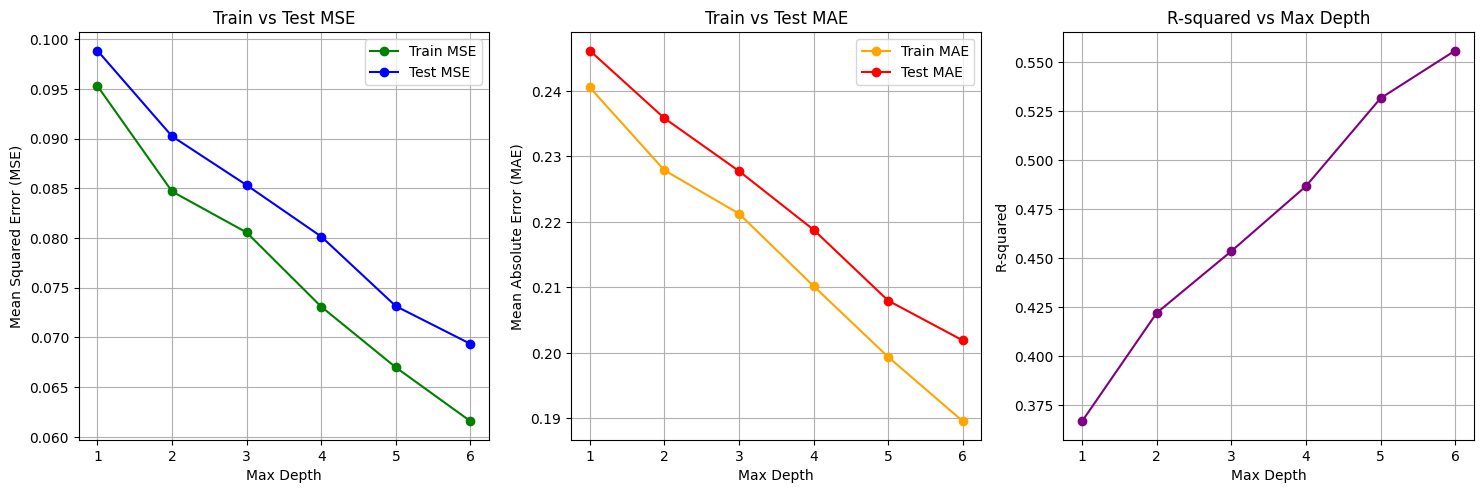

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Function to train the model and return predictions
def predictive_model_regression(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Fit the model to the training data
    model.fit(x_train, y_train)

    # Make predictions on both training and test sets
    y_pred_test = model.predict(x_test)   # Predictions on the test set
    y_pred_train = model.predict(x_train)  # Predictions on the training set

    # Return the trained model, test data, and predictions
    return model, x_test, y_test, y_pred_train, y_train, y_pred_test

# Initialize lists to store the results for various metrics
train_mse = []
test_mse = []
train_mae = []
test_mae = []
r2_scores = []

# Range of max depth values to test for the Decision Tree (from 1 to 10)
max_depth_values = range(1, 7)

# Extract features and target from the updated dataset
x = updated_data.drop('AveragePrice', axis=1)  # Features (all columns except target)
y = updated_data['AveragePrice']  # Target (target column)

# Loop over each max depth value to train the model and calculate metrics
for max_depth in max_depth_values:
    # Initialize a DecisionTreeRegressor with the current max depth
    model = DecisionTreeRegressor(random_state=42, max_depth=max_depth)

    # Train the model and get predictions
    model, x_test, y_test, y_pred_train, y_train, y_pred_test = predictive_model_regression(model, x, y)

    # Calculate regression metrics
    mse_train = mean_squared_error(y_train, y_pred_train)  # Mean Squared Error on the training set
    mse_test = mean_squared_error(y_test, y_pred_test)      # Mean Squared Error on the test set
    mae_train = mean_absolute_error(y_train, y_pred_train)  # Mean Absolute Error on the training set
    mae_test = mean_absolute_error(y_test, y_pred_test)     # Mean Absolute Error on the test set
    r2 = r2_score(y_test, y_pred_test)                      # R-squared score

    # Append the calculated metric values to their respective lists
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    train_mae.append(mae_train)
    test_mae.append(mae_test)
    r2_scores.append(r2)

    # Print metrics for current max depth
    print(f'Max Depth: {max_depth}')
    print(f'Train MSE: {mse_train:.4f}')
    print(f'Test MSE: {mse_test:.4f}')
    print(f'Train MAE: {mae_train:.4f}')
    print(f'Test MAE: {mae_test:.4f}')
    print(f'R-squared: {r2:.4f}\n')

# Plot the metrics against max depth values using subplots
plt.figure(figsize=(18, 18))

# Plot Train vs Test MSE
plt.subplot(3, 3, 1)
plt.plot(max_depth_values, train_mse, marker='o', linestyle='-', color='green', label='Train MSE')
plt.plot(max_depth_values, test_mse, marker='o', linestyle='-', color='blue', label='Test MSE')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Mean Squared Error (MSE)')  # Y-axis label
plt.title('Train vs Test MSE')  # Title
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines

# Plot Train vs Test MAE
plt.subplot(3, 3, 2)
plt.plot(max_depth_values, train_mae, marker='o', linestyle='-', color='orange', label='Train MAE')
plt.plot(max_depth_values, test_mae, marker='o', linestyle='-', color='red', label='Test MAE')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Mean Absolute Error (MAE)')  # Y-axis label
plt.title('Train vs Test MAE')  # Title
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines

# Plot R-squared vs Max Depth
plt.subplot(3, 3, 3)
plt.plot(max_depth_values, r2_scores, marker='o', linestyle='-', color='purple', label='R-squared')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('R-squared')  # Y-axis label
plt.title('R-squared vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Display the plots
plt.show()

# Save only the predicted values
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_test})

# Save the predicted values to a CSV file
predictions_df.to_csv('predicted_values_dtr_regression.csv', index=False)

# Make a single prediction on a new input data point
# The values in the list are features corresponding to the trained model's input



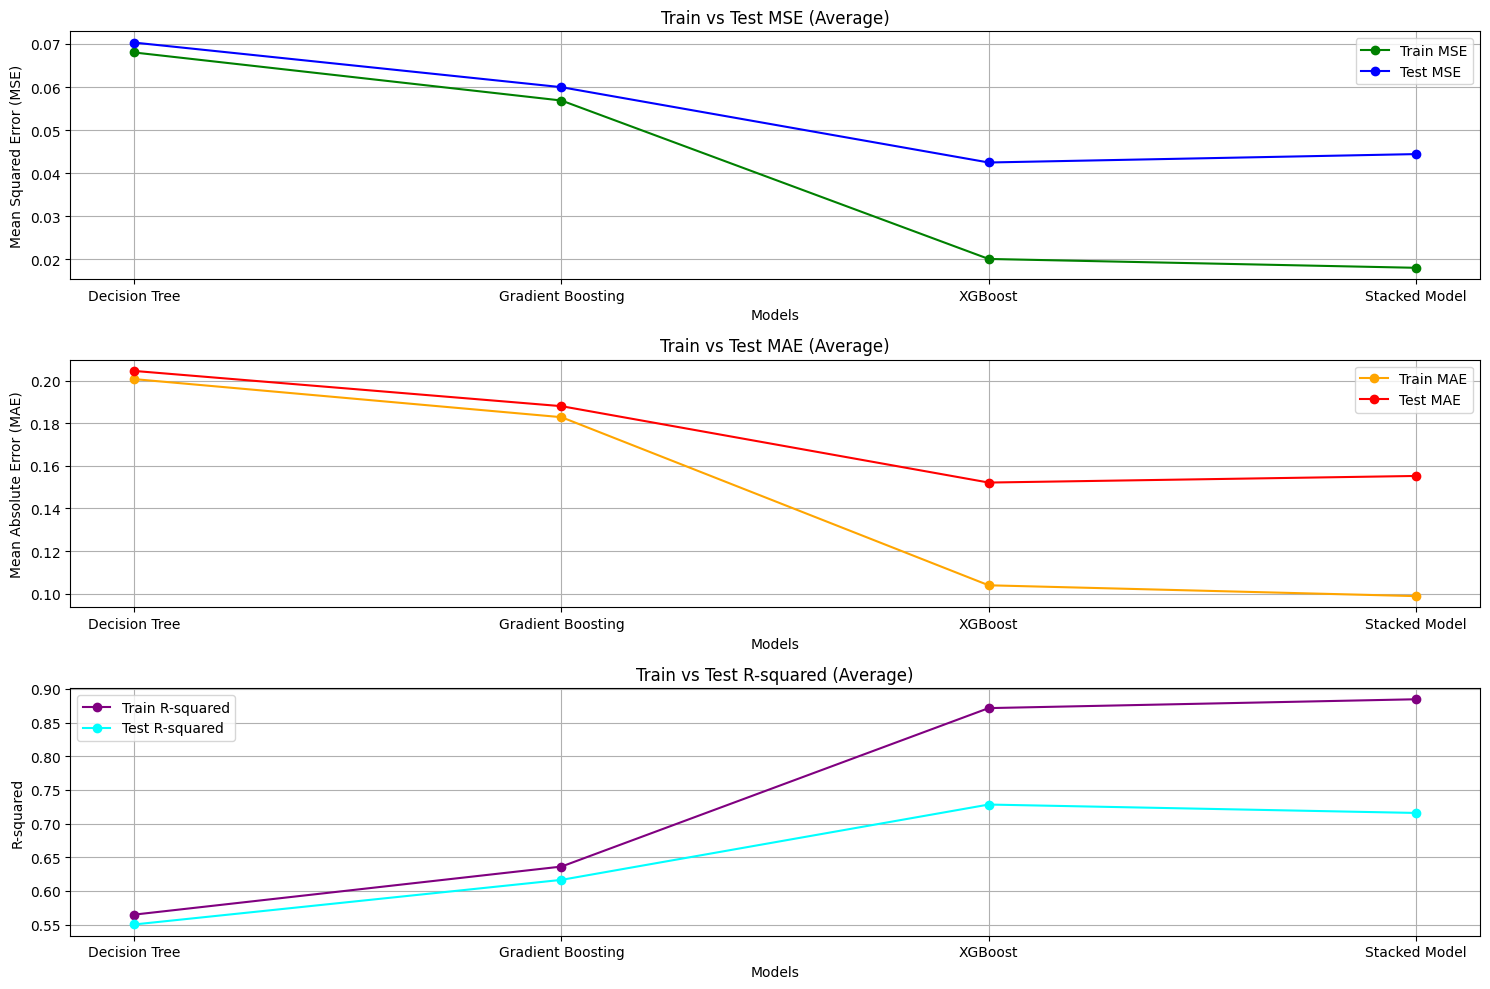

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Initialize results storage
train_mse_list = []
test_mse_list = []
train_mae_list = []
test_mae_list = []
r2_scores_train_list = []
r2_scores_test_list = []

# Number of iterations
iterations = 21

for i in range(iterations):
    # Split the data for each iteration
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 + i)

    # Initialize models
    decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42 + i)
    gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42 + i)
    xgboost = XGBRegressor(n_estimators=100, random_state=42 + i)

    # Train models
    decision_tree.fit(x_train, y_train)
    gradient_boosting.fit(x_train, y_train)
    xgboost.fit(x_train, y_train)

    # Generate predictions for each model on train and test sets
    dt_train_pred = decision_tree.predict(x_train)
    dt_test_pred = decision_tree.predict(x_test)

    gb_train_pred = gradient_boosting.predict(x_train)
    gb_test_pred = gradient_boosting.predict(x_test)

    xgb_train_pred = xgboost.predict(x_train)
    xgb_test_pred = xgboost.predict(x_test)

    # Combine predictions for the meta-model (Stacking)
    train_meta_features = np.column_stack((dt_train_pred, gb_train_pred, xgb_train_pred))
    test_meta_features = np.column_stack((dt_test_pred, gb_test_pred, xgb_test_pred))

    meta_model = LinearRegression()
    meta_model.fit(train_meta_features, y_train)

    # Predictions from the stacked model
    stacked_train_pred = meta_model.predict(train_meta_features)
    stacked_test_pred = meta_model.predict(test_meta_features)

    # Calculate evaluation metrics for all models
    models = ["Decision Tree", "Gradient Boosting", "XGBoost", "Stacked Model"]
    train_mse = [
        mean_squared_error(y_train, dt_train_pred),
        mean_squared_error(y_train, gb_train_pred),
        mean_squared_error(y_train, xgb_train_pred),
        mean_squared_error(y_train, stacked_train_pred),
    ]
    test_mse = [
        mean_squared_error(y_test, dt_test_pred),
        mean_squared_error(y_test, gb_test_pred),
        mean_squared_error(y_test, xgb_test_pred),
        mean_squared_error(y_test, stacked_test_pred),
    ]
    train_mae = [
        mean_absolute_error(y_train, dt_train_pred),
        mean_absolute_error(y_train, gb_train_pred),
        mean_absolute_error(y_train, xgb_train_pred),
        mean_absolute_error(y_train, stacked_train_pred),
    ]
    test_mae = [
        mean_absolute_error(y_test, dt_test_pred),
        mean_absolute_error(y_test, gb_test_pred),
        mean_absolute_error(y_test, xgb_test_pred),
        mean_absolute_error(y_test, stacked_test_pred),
    ]
    r2_scores_train = [
        r2_score(y_train, dt_train_pred),
        r2_score(y_train, gb_train_pred),
        r2_score(y_train, xgb_train_pred),
        r2_score(y_train, stacked_train_pred),
    ]
    r2_scores_test = [
        r2_score(y_test, dt_test_pred),
        r2_score(y_test, gb_test_pred),
        r2_score(y_test, xgb_test_pred),
        r2_score(y_test, stacked_test_pred),
    ]

    # Store results for this iteration
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    r2_scores_train_list.append(r2_scores_train)
    r2_scores_test_list.append(r2_scores_test)

# Plot the metrics for train and test datasets as line plots
plt.figure(figsize=(15, 10))

# Train vs Test MSE (Average across iterations)
avg_train_mse = np.mean(train_mse_list, axis=0)
avg_test_mse = np.mean(test_mse_list, axis=0)

plt.subplot(3, 1, 1)
plt.plot(models, avg_train_mse, marker='o', linestyle='-', label='Train MSE', color='green')
plt.plot(models, avg_test_mse, marker='o', linestyle='-', label='Test MSE', color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train vs Test MSE (Average)')
plt.legend()
plt.grid(True)

# Train vs Test MAE (Average across iterations)
avg_train_mae = np.mean(train_mae_list, axis=0)
avg_test_mae = np.mean(test_mae_list, axis=0)

plt.subplot(3, 1, 2)
plt.plot(models, avg_train_mae, marker='o', linestyle='-', label='Train MAE', color='orange')
plt.plot(models, avg_test_mae, marker='o', linestyle='-', label='Test MAE', color='red')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Train vs Test MAE (Average)')
plt.legend()
plt.grid(True)

# Train vs Test R-squared (Average across iterations)
avg_r2_scores_train = np.mean(r2_scores_train_list, axis=0)
avg_r2_scores_test = np.mean(r2_scores_test_list, axis=0)

plt.subplot(3, 1, 3)
plt.plot(models, avg_r2_scores_train, marker='o', linestyle='-', label='Train R-squared', color='purple')
plt.plot(models, avg_r2_scores_test, marker='o', linestyle='-', label='Test R-squared', color='cyan')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Train vs Test R-squared (Average)')
plt.legend()
plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()